In [1]:
%matplotlib notebook

In [2]:
import tensorflow as tf
import numpy as np
import time

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_circles

In [3]:
N=210
K=2
# Maximum number of iterations, if the conditions are not met
MAX_ITERS = 1000
cut=int(N*0.7)

In [4]:
start = time.time()

In [13]:
data, features = make_circles(n_samples=N, shuffle=True, noise= 0.12, factor=0.4)
tr_data, tr_features= data[:cut], features[:cut]
te_data,te_features=data[cut:], features[cut:]

<IPython.core.display.Javascript object>


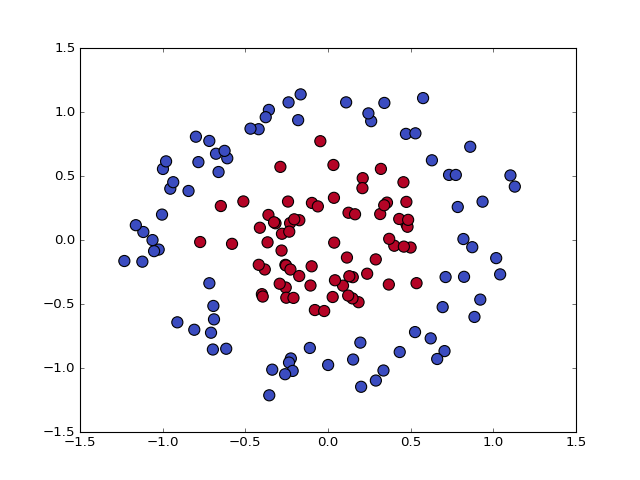

[]

In [12]:
fig, ax = plt.subplots()
ax.scatter(tr_data.transpose()[0], tr_data.transpose()[1], marker = 'o', s = 100, c = tr_features, cmap=plt.cm.coolwarm )
plt.plot()

In [7]:
points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))

In [8]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]


<IPython.core.display.Javascript object>


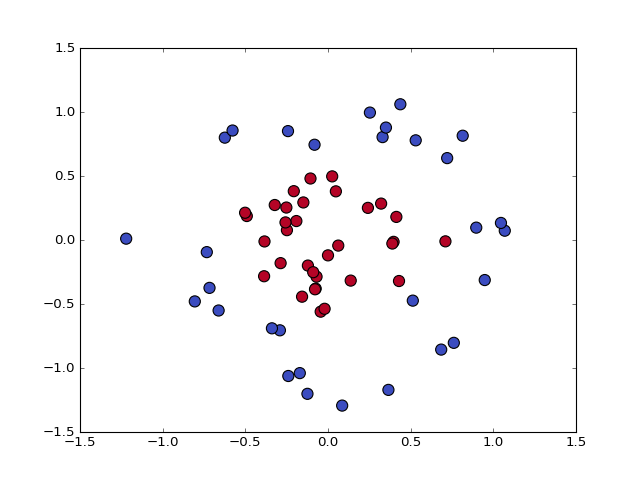

[]

In [14]:
test=[]

for i, j in zip(te_data, te_features):
    distances = tf.reduce_sum(tf.square(tf.sub(i , tr_data)),reduction_indices=1)
    neighbor = tf.arg_min(distances,0)
    
    #print tr_features[sess.run(neighbor)]
    #print j
    test.append(tr_features[sess.run(neighbor)])
print test
fig, ax = plt.subplots()
ax.scatter(te_data.transpose()[0], te_data.transpose()[1], marker = 'o', s = 100, c = test, cmap=plt.cm.coolwarm )
plt.plot()

#rep_points_v = tf.reshape(points, [1, N, 2])
#rep_points_h = tf.reshape(points, [N, 2])
#sum_squares = tf.reduce_sum(tf.square(rep_points - rep_points), reduction_indices=2)
#print(sess.run(tf.square(rep_points_v - rep_points_h)))


In [17]:
end = time.time()
print ("Found in %.2f seconds" % (end-start))
print "Cluster assignments:", test

Found in 180.42 seconds
Cluster assignments: [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]
